Part 1 – Import the required Python, Pandas, Matplotlib, Seaborn packages
1. Load the Titanic Ship Passengers dataset into a dataframe using pandas
2. Check the data types of each feature(column) in the dataset.
3. Generate a summary of the dataset for min, max, stddev,
quartile vales for 25%,50%,75%,90%,
4. List the names of columns/features in the dataset
5. Perform Exploratory analysis - plot numeric features, check relative size of survived/unsurvived, check if any pattern on gender. passenger class, class-wise survival rate, sibilings, overall age distribution, class-wise age distribution - apply bar plot, histogram,
box plots to visualize.
6. Perform data wrangling - impute age data, drop unnecessary features, recode the categorical features to a class

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from collections import Counter
import seaborn as sns
import random as rd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
df = pd.read_csv('/content/titanic.csv')
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%     

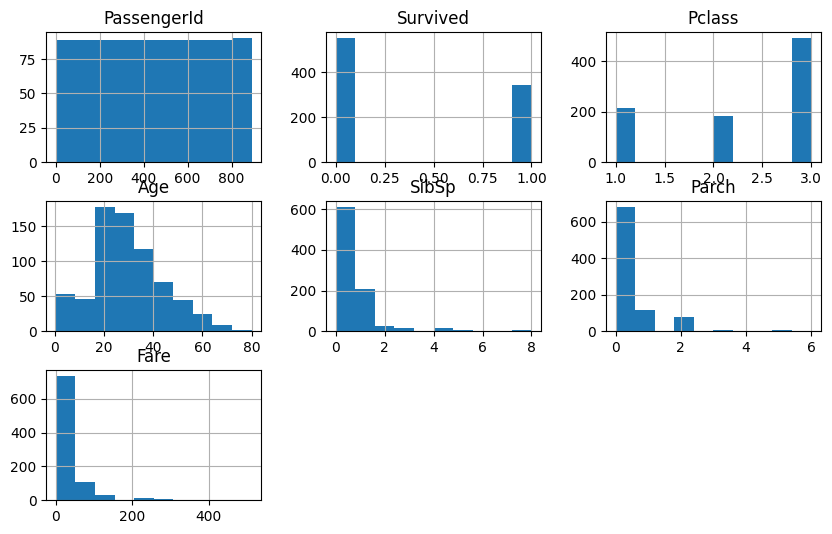

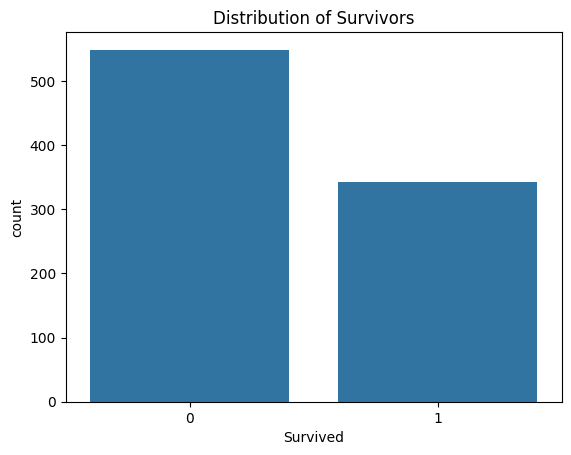

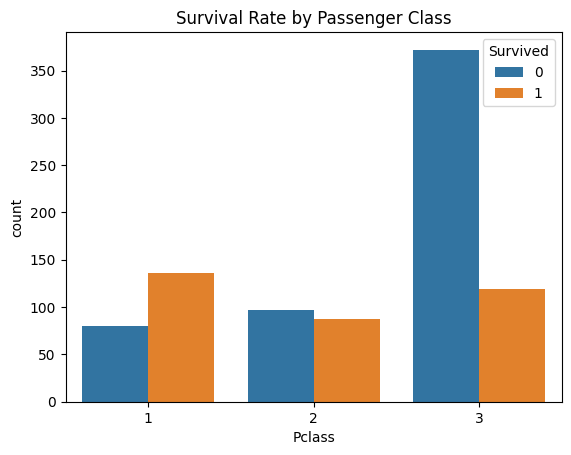

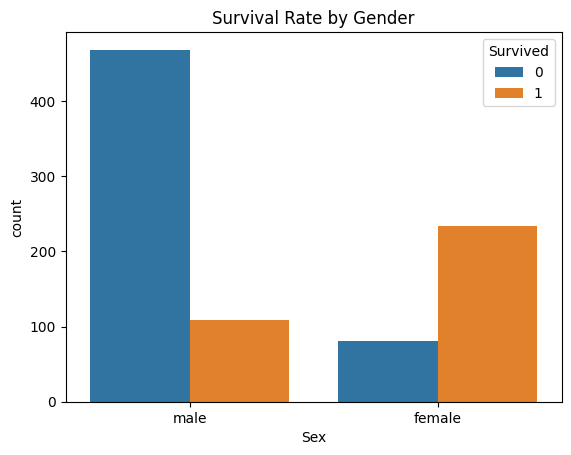

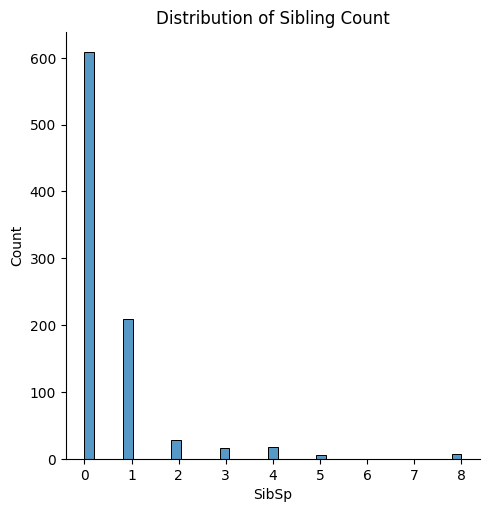

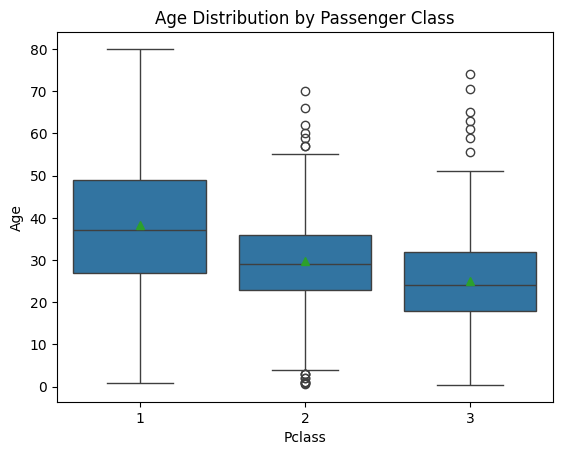

Data wrangling complete!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Check data types
print(df.dtypes)

# 3. Generate descriptive summary
print(df.describe(include='all'))  # Include categorical variables

# 4. List column names
print(df.columns)

# 5. Exploratory data analysis (EDA)

# - Plot numeric features (e.g., Fare, Age)
df.hist(figsize=(10, 6))  # Adjust figure size as needed
plt.subplots_adjust(bottom=0.1)  # Avoid overlapping labels
plt.show()

# - Relative size of survived/unsurvived
sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survivors')
plt.show()

# - Check for patterns on gender, passenger class, class-wise survival rate
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

# - Sibling count distribution
sns.displot(df['SibSp'])  # Consider using displot for non-normal distributions
plt.title('Distribution of Sibling Count')
plt.show()

# - Overall and class-wise age distribution (using boxplots)
sns.boxplot(
    x="Pclass",
    y="Age",
    showmeans=True,  # Display mean as diamond
    data=df
)
plt.title('Age Distribution by Passenger Class')
plt.show()

# 6. Data wrangling

# - Impute missing age data (consider domain knowledge and imputation techniques)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')  # Using median for numeric data
df['Age'] = imputer.fit_transform(df[['Age']])

# - Drop unnecessary features (if applicable, based on domain knowledge)
# ... (Example: If 'Cabin' is not relevant to your analysis, you might drop it)

# - Recode categorical features to numerical classes
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Encode categorical columns (e.g., Pclass, Sex)
df['Pclass'] = le.fit_transform(df['Pclass'])
df['Sex'] = le.fit_transform(df['Sex'])

# ... (Encode other categorical columns as needed)

print('Data wrangling complete!')

Part 2 – Model training and Fit the data to Model
1. Split the data generated from list created as X, Y is distributed using train test split
function as X train, Y train, X test, Y test
2. Apply the logistic regression model of sklearn package
3. Fit the data to the Logistic Model using fit
4. Compute the F1 score as function of penalty , F1 as function of test data. Plot both
outcomes using scatter plots.

In [ ]:
# Try extracting numeric part using regular expressions
import re
df['Ticket_Numeric'] = df['Ticket'].str.extract('(\d+)', expand=False).astype(float)

# Handle missing values (e.g., using imputation techniques)
imputer = SimpleImputer(strategy='constant', fill_value=0)  # Replace missing values with 0
df['Ticket_Numeric'] = imputer.fit_transform(df[['Ticket_Numeric']])

# Encode the new feature (optional)
le = LabelEncoder()
df['Ticket_Numeric'] = le.fit_transform(df['Ticket_Numeric'])
from sklearn.preprocessing import OneHotEncoder
ticket_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
ticket_encoded = ticket_encoder.fit_transform(df[['Ticket']])
ticket_encoded_df = pd.DataFrame(ticket_encoded, columns=ticket_encoder.get_feature_names_out(['Ticket']))
df = pd.concat([df, ticket_encoded_df], axis=1).drop('Ticket', axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin',
       ...
       'Ticket_STON/O2. 3101290', 'Ticket_SW/PP 751', 'Ticket_W./C. 14258',
       'Ticket_W./C. 14263', 'Ticket_W./C. 6607', 'Ticket_W./C. 6608',
       'Ticket_W./C. 6609', 'Ticket_W.E.P. 5734', 'Ticket_W/C 14208',
       'Ticket_WE/P 5735'],
      dtype='object', length=693)


In [ ]:
# Check column names
print(df.columns)

# Investigate 'Embarked' column
print(df['Embarked'].head())  # Look at the first few values

# If 'S' is a valid category (e.g., a new port)
le = LabelEncoder()
df['Embarked'] = le.fit_transform(df['Embarked'])

# If 'S' is an error/outlier (consider replacing or dropping rows)
df.loc[df['Embarked'] == 'S', 'Embarked'] = 'C'  # Replace with a more frequent port (example)
# OR
df = df.dropna(subset=['Embarked'])  # Drop rows with 'S' if it's an outlier (example)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin',
       ...
       'Ticket_STON/O2. 3101290', 'Ticket_SW/PP 751', 'Ticket_W./C. 14258',
       'Ticket_W./C. 14263', 'Ticket_W./C. 6607', 'Ticket_W./C. 6608',
       'Ticket_W./C. 6609', 'Ticket_W.E.P. 5734', 'Ticket_W/C 14208',
       'Ticket_WE/P 5735'],
      dtype='object', length=693)
0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: object


In [ ]:
# Assuming you kept 'Cabin_Class' or have dummy variables
X = df.drop(['Survived'], axis=1)  # Adjust features based on your choice
y_train = y_train.copy()  # Avoid SettingWithCopy warning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Split data into features (X) and target variable (y)
X = df.drop('Survived', axis=1)  # Features
y = df['Survived']  # Target variable

# Split data into training and testing sets
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']  # Identify categorical columns
X = df.drop(['Name', 'Survived'], axis=1)  # Drop 'Name' and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test

# Apply Logistic Regression model
model = LogisticRegression()
# Check for missing values before encoding
print(df.isnull().sum())
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Create a label encoder object
le = LabelEncoder()

# Apply encoding to categorical columns (e.g., Embarked, Sex)
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']  # Identify categorical columns
X = df.drop(['Name', 'Survived'], axis=1)  # Drop 'Name' and target variable

# Train the model
model.fit(X_train, y_train)

# Function to compute F1 score for different penalty values (C)
def compute_f1_score_penalty(penalty_range):
  f1_scores = []
  for c in penalty_range:
    model = LogisticRegression(C=c)  # Set regularization parameter (C)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred))
  return f1_scores

# Compute F1 score for various penalty values
penalty_range = [0.001, 0.01, 0.1, 1, 10, 100]  # Experiment with different values
f1_scores_penalty = compute_f1_score_penalty(penalty_range)

# Function to compute F1 score on test data
def compute_f1_score_test():
  y_pred = model.predict(X_test)
  return f1_score(y_test, y_pred)

# F1 score on test data
f1_score_test_data = compute_f1_score_test()

# Plot F1 score vs. penalty
plt.figure(figsize=(8, 6))
plt.scatter(penalty_range, f1_scores_penalty, label='F1 Score (Penalty)')
plt.axhline(y=f1_score_test_data, color='r', linestyle='--', label='F1 Score (Test Data)')
plt.xlabel('Penalty (C)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Penalty (Logistic Regression)')
plt.legend()
plt.grid(True)
plt.show()

print('F1 Score (Test Data):', f1_score_test_data)

PassengerId           0
Survived              0
Pclass                0
Name                  0
Sex                   0
                     ..
Ticket_W./C. 6608     0
Ticket_W./C. 6609     0
Ticket_W.E.P. 5734    0
Ticket_W/C 14208      0
Ticket_WE/P 5735      0
Length: 693, dtype: int64


ValueError: could not convert string to float: 'C124'